<a href="https://colab.research.google.com/github/minhnguyen250202/RFM-Analysis---Python/blob/main/PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
! pip install pandas-profiling
! pip install pydantic-settings
! pip install ydata_profiling
! pip install squarify

import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import squarify

# UNDERSTAND ABOUT THE DATA

Tóm tắt hướng xử lý

**Xử lý data value không hợp lý:**
- Loại bỏ các giá trị âm (Quantity < 0, Unit Price < 0)

**Xử lý data missing:**
- Loại bỏ bảng ghi bị null CustomerID

**Xử lý data duplication**
- Loại bỏ dữ liệu trùng


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/DATA | Unigap /PYTHON/PROJECT PYTHON/Project 3/'

ecommerce_retail = pd.read_excel(path +'ecommerce retail.xlsx', sheet_name='ecommerce retail')
ecommerce_retail.head()

Mounted at /content/drive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Kiểm tra thông tin về data type and data value

In [ ]:
#Kiểm tra tổng quan dữ liệu
print('Kiểm tra dữ liệu tổng quan')
print(ecommerce_retail.info())
#Kiểm tra data value bất hợp lý của các cột
print('Kiểm tra data value bất hợp lý')
print(ecommerce_retail.describe())

Kiểm tra dữ liệu tổng quan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
Kiểm tra data value bất hợp lý
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            201

Nhận xét:
- Description và CustomerID đang bị thiếu dữ liệu
- Giá trị ở cột Quantity và UnitPrice có sự bất thường vì có Min nhỏ hơn 0


Sử dụng Profile Report để hiểu được Category Data Type

In [ ]:
profile= ProfileReport(ecommerce_retail)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:10<00:00,  1.33s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Kiểm tra các lý do làm cho cột Quantity có data value bất hợp lý

In [ ]:
#Detect những lý do mà các cột chứa data value bất hợp lý
print('Một số đơn hàng có Quantity <0')
print(ecommerce_retail[ecommerce_retail['Quantity']<0].head())
print('')

#Kiểm tra lý do cột Quantity <0 có phải do giao dịch bị huỷ hay không
print('Kiểm tra lý do cột Quantity <0')
ecommerce_retail['InvoiceNo']= ecommerce_retail['InvoiceNo'].astype(str)
ecommerce_retail['Check_cancel']= ecommerce_retail['InvoiceNo'].apply(lambda x:True if x[0] =='C' else False )

print(ecommerce_retail[(ecommerce_retail['Quantity'] < 0) & (ecommerce_retail['Check_cancel'] == True)].head())

print(' ')
ecommerce_retail[(ecommerce_retail['Quantity'] < 0) & (ecommerce_retail['Check_cancel'] == False)].head()

Một số đơn hàng có Quantity <0
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  

Kiểm tra lý do cột Quantity <0
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Check_cancel
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False


Kiểm tra các lý do làm cho cột UnitPrice có data value bất hợp lý

In [ ]:
print('Một số đơn hàng có UnitPrice <0')
ecommerce_retail[ecommerce_retail['UnitPrice']<0]


Một số đơn hàng có UnitPrice <0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Check_cancel
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False


Xử lý data value không hợp lý


In [ ]:
new_ecommerce_retail = ecommerce_retail[ecommerce_retail["UnitPrice"]>0]
new_ecommerce_retail = new_ecommerce_retail[new_ecommerce_retail["Quantity"]>0]
new_ecommerce_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Check_cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


Xử lý data type không hợp lý

In [ ]:
#Chuyển CustomerID về dạng số nguyên
new_ecommerce_retail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  object        
 1   StockCode     530104 non-null  object        
 2   Description   530104 non-null  object        
 3   Quantity      530104 non-null  int64         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       530104 non-null  object        
 8   Check_cancel  530104 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.9+ MB


Kiểm tra các cột có missing value

In [ ]:
print('Thống kê các cột có missing value')
missing_dict ={
              'volume': new_ecommerce_retail.isnull().sum(),
              'percent': new_ecommerce_retail.isnull().sum()/(new_ecommerce_retail.shape[0])}

missing_ecommerce_retail =pd.DataFrame.from_dict(missing_dict)
missing_ecommerce_retail

Thống kê các cột có missing value


,volume,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,0.249423
Country,0,0.000000
Check_cancel,0,0.000000


In [ ]:
print(new_ecommerce_retail[new_ecommerce_retail["CustomerID"].isnull()].head(10))

print(new_ecommerce_retail[new_ecommerce_retail["CustomerID"].isnull()].tail(10))

new_ecommerce_retail['Day']=pd.to_datetime(new_ecommerce_retail['InvoiceDate']).dt.date
new_ecommerce_retail['Month']= new_ecommerce_retail['Day'].apply(lambda x: str(x)[:-3])
new_ecommerce_retail_group_day= new_ecommerce_retail[new_ecommerce_retail["CustomerID"].isnull()][['Month','InvoiceNo']].groupby(['Month']).count().reset_index().sort_values(by= ['Month'], ascending =True)
new_ecommerce_retail_group_day.head(10)

     InvoiceNo StockCode                          Description  Quantity  \
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452    536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   

             InvoiceDate  UnitPrice  CustomerID         Country  Check_cancel  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom         False  
1444 2010-12-0

,Month,InvoiceNo
0,2010-12,15323
1,2011-01,13077
2,2011-02,7178
3,2011-03,8628
4,2011-04,6454
5,2011-05,7844
6,2011-06,8792
7,2011-07,11820
8,2011-08,7476
9,2011-09,9233


In [ ]:
#Drop hơn 20% số lượng ngừoi mua có CustomerID là null
new_ecommerce_retail_2=new_ecommerce_retail[new_ecommerce_retail["CustomerID"].notnull()]
new_ecommerce_retail_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Check_cancel,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12


Kiểm tra lý do bị duplicate

In [ ]:
new_ecommerce_retail_2_duplication = new_ecommerce_retail_2.duplicated(subset=["InvoiceNo","StockCode","InvoiceDate","CustomerID"])
print(new_ecommerce_retail_2_duplication.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


DATA PROCESSING




# DATA PROCESSING

Tính chi phí và tìm ra ngày cuối cùng

RFM

In [ ]:
new_ecommerce_retail_2["cost"]=new_ecommerce_retail_2["Quantity"]*new_ecommerce_retail_2["UnitPrice"]
last_day=new_ecommerce_retail_2['Day'].max()

RFM=new_ecommerce_retail_2.groupby("CustomerID").agg(
    Recency= ('Day', lambda x: last_day - x.max()),
    Frequency = ("CustomerID", 'count'),
    Monetary = ("cost", 'sum'),
    Start_Day = ('Day', 'min')).reset_index()
RFM.head()

RFM["Recency"] =RFM["Recency"].dt.days.astype('int64')
RFM["Start_Day"]=pd.to_datetime(RFM["Start_Day"])
RFM["Start_Month"]=RFM["Start_Day"].apply(lambda x: x.replace(day=1))
RFM.head()


<ipython-input-35-02987fb1c69d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ecommerce_retail_2["cost"]=new_ecommerce_retail_2["Quantity"]*new_ecommerce_retail_2["UnitPrice"]


,CustomerID,Recency,Frequency,Monetary,Start_Day,Start_Month
0,12346.0,325,1,77183.60,2011-01-18,2011-01-01
1,12347.0,2,182,4310.00,2010-12-07,2010-12-01
2,12348.0,75,31,1797.24,2010-12-16,2010-12-01
3,12349.0,18,73,1757.55,2011-11-21,2011-11-01
4,12350.0,310,17,334.40,2011-02-02,2011-02-01


In [ ]:
#Ngược lại của cột Recency
RFM["Recency_Reverse"]= -RFM["Recency"]


In [ ]:
RFM["R"]=pd.qcut(RFM["Recency_Reverse"], 5, labels= range(1,6)).astype('int64')
RFM["F"]=pd.qcut(RFM["Frequency"], 5, labels= range(1,6))
RFM["M"]=pd.qcut(RFM["Monetary"], 5, labels= range(1,6))
RFM["RFM_Score"]=RFM["R"].astype(str)+RFM["F"].astype(str)+RFM["M"].astype(str)
RFM.head()


,CustomerID,Recency,Frequency,Monetary,Start_Day,Start_Month,Recency_Reverse,R,F,M,RFM_Score
0,12346.0,325,1,77183.60,2011-01-18,2011-01-01,-325,1,1,5,115
1,12347.0,2,182,4310.00,2010-12-07,2010-12-01,-2,5,5,5,555
2,12348.0,75,31,1797.24,2010-12-16,2010-12-01,-75,2,3,4,234
3,12349.0,18,73,1757.55,2011-11-21,2011-11-01,-18,4,4,4,444
4,12350.0,310,17,334.40,2011-02-02,2011-02-01,-310,1,2,2,122


In [ ]:
Segmentation=pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')
Segmentation["RFM Score"]=Segmentation["RFM Score"].str.split(',')
Segmentation = Segmentation.explode("RFM Score").reset_index(drop=True)
Segmentation.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
#Gộp 2 bảng
RFM_final = RFM.merge(Segmentation, left_on='RFM_Score', right_on='RFM Score')
RFM_final.head(20)

,CustomerID,Recency,Frequency,Monetary,Start_Day,Start_Month,Recency_Reverse,R,F,M,RFM_Score,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,2011-01-01,-325,1,1,5,115,Cannot Lose Them,115
1,12347.0,2,182,4310.00,2010-12-07,2010-12-01,-2,5,5,5,555,Champions,555
2,12353.0,204,4,89.00,2011-05-19,2011-05-01,-204,1,1,1,111,Lost customers,111
3,12361.0,287,10,189.90,2011-02-25,2011-02-01,-287,1,1,1,111,Lost customers,111
4,12362.0,3,266,5226.23,2011-02-17,2011-02-01,-3,5,5,5,555,Champions,555
5,12378.0,129,219,4008.62,2011-08-02,2011-08-01,-129,2,5,5,255,At Risk,255
6,12401.0,303,5,84.30,2011-02-09,2011-02-01,-303,1,1,1,111,Lost customers,111
7,12402.0,323,11,225.60,2011-01-20,2011-01-01,-323,1,1,1,111,Lost customers,111
8,12417.0,3,192,3649.10,2010-12-17,2010-12-01,-3,5,5,5,555,Champions,555
9,12433.0,0,420,13375.87,2010-12-01,2010-12-01,0,5,5,5,555,Champions,555


In [ ]:
#Phân loại nhóm khách hàng

#DATA VISUALISATION



<ipython-input-58-3c6c92d976fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=RFM_final["Segment"], order=RFM_final["Segment"].value_counts().index, palette="viridis")


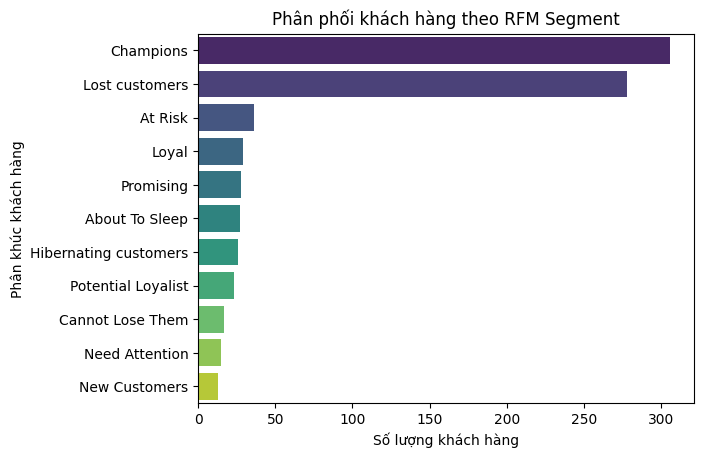

In [ ]:
#Biểu đồ phân bố nhóm khách hàng theo RFM Segment
sns.countplot(y=RFM_final["Segment"], order=RFM_final["Segment"].value_counts().index, palette="viridis")
plt.xlabel("Số lượng khách hàng")
plt.ylabel("Phân khúc khách hàng")
plt.title("Phân phối khách hàng theo RFM Segment")
plt.show()

<ipython-input-60-b1fd6cdcbf29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Monetary", data=RFM_top, palette="coolwarm")


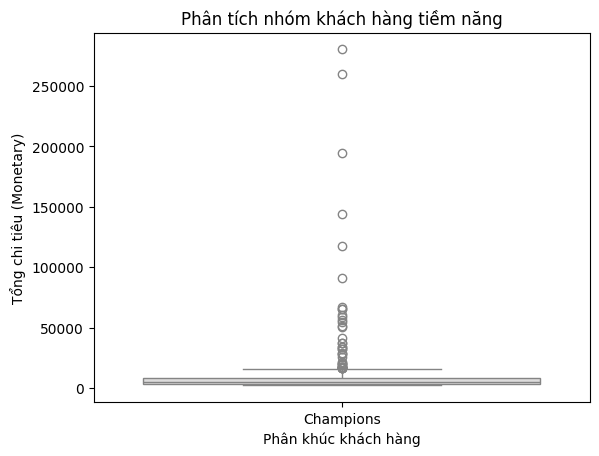

In [ ]:
top_segments = ["Champions", "Loyal Customers"]
RFM_top = RFM_final[RFM_final["Segment"].isin(top_segments)]

sns.boxplot(x="Segment", y="Monetary", data=RFM_top, palette="coolwarm")
plt.xlabel("Phân khúc khách hàng")
plt.ylabel("Tổng chi tiêu (Monetary)")
plt.title("Phân tích nhóm khách hàng tiềm năng")
plt.show()

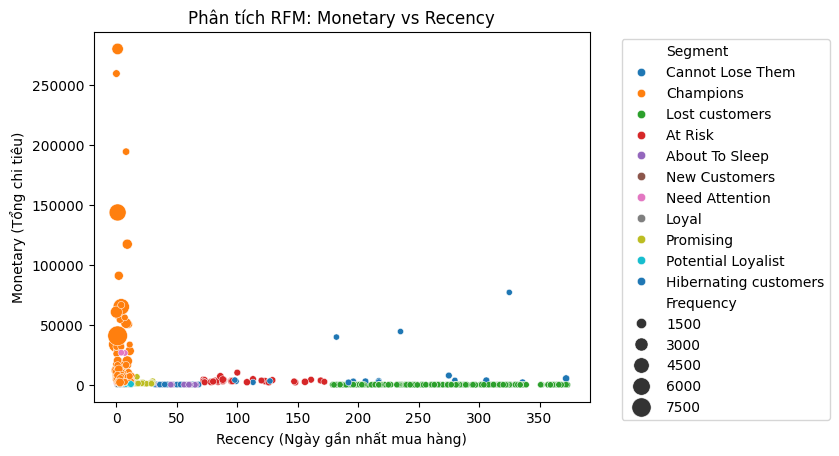

In [ ]:
sns.scatterplot(data=RFM_final, x="Recency", y="Monetary", hue="Segment", palette="tab10", size="Frequency", sizes=(20,200))
plt.xlabel("Recency (Ngày gần nhất mua hàng)")
plt.ylabel("Monetary (Tổng chi tiêu)")
plt.title("Phân tích RFM: Monetary vs Recency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Biểu đồ thể hiện nhóm khách hàng nên có chiến lược Marketing mạnh mẽ hơn sơ với các nhóm khác

seg_by_user_count=RFM_final[["Segment","CustomerID"]].groupby(["Segment"]).count()
seg_by_user_count["Contribution_percent"]=ROUND()